In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# Кластеризация k-means
k-means - один из алгоритмов вероятностного подхода

In [2]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=100)

In [3]:
def make_data(n, seed):
    np.random.seed(seed)
    shift_matrix = np.array([[3, 3],
                             [6, 9],
                              [9, 3]])
    
    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]]) 
    
    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
                     columns=['x', 'y'])
    df.sample(frac=1.0)
    
    return df

In [4]:
train = make_data(10, 42)
test = make_data(10, 27)

Text(0.5, 1.0, 'Train')

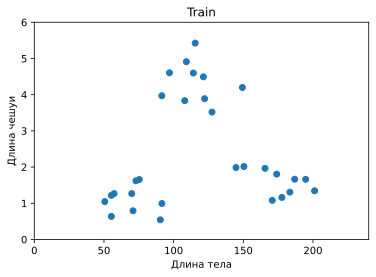

In [5]:
plt.scatter(train['x'], train['y'])
plt.xlim(0, 240)
plt.ylim(0, 6)

plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [7]:
train_scaled = scaler.fit_transform(train)
train_scaled = pd.DataFrame(train_scaled, columns=['x', 'y'])

Text(0.5, 1.0, 'Train')

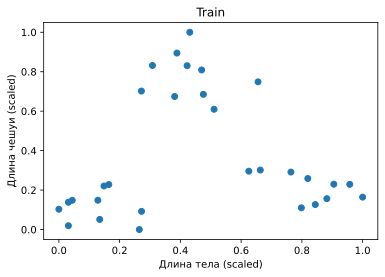

In [8]:
plt.scatter(train_scaled['x'], train_scaled['y'])

plt.xlabel('Длина тела (scaled)')
plt.ylabel('Длина чешуи (scaled)')
plt.title('Train')

In [9]:
train_labels = model.fit_predict(train_scaled)

train_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

## Центры кластеров

In [10]:
model.cluster_centers_

array([[0.12190576, 0.11495728],
       [0.82595794, 0.21634417],
       [0.4314873 , 0.77857028]])

In [11]:
centers = scaler.inverse_transform(model.cluster_centers_)
centers

array([[ 68.96122223,   1.10467088],
       [174.94355655,   1.59972071],
       [115.56312871,   4.34494667]])

Text(0.5, 1.0, 'Train')

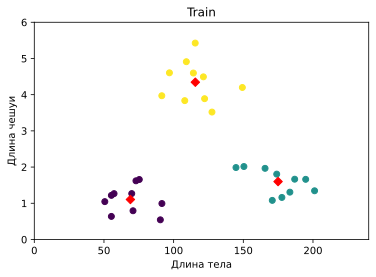

In [12]:
plt.scatter(train['x'], train['y'], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

plt.xlim(0, 240)
plt.ylim(0, 6)

plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')

## Inertia
Величина показывающая, насколько в среднем расположены точки от центров своих кластеров
\- сумма квадратов расстояний от объектов до центров.

Чем меньше, тем лучше разбиение, но нужно следить за балансом кластеров и значением.

Равна нулю, если кластеров столько же, сколько и объектов. 

In [13]:
interia_arr = []
for i in range(2, 10):
    temp_model = KMeans(n_clusters=i, random_state=100)
    temp_model.fit(train_scaled)
    
    tem_inertia = temp_model.inertia_
    interia_arr.append(tem_inertia)
    
    print(tem_inertia)

2.9002641632095463
0.5417377477488046
0.4281736891174851
0.3322112457703983
0.2630515767358077
0.2181851152202017
0.17441872903715117
0.14332722644254758


Text(0.5, 1.0, 'Inertia')

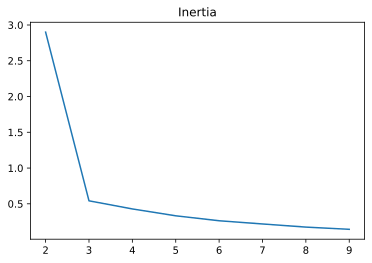

In [14]:
plt.plot([i for i in range(2, 10)], interia_arr)
plt.title('Inertia')

## Отнесение примеров из тестового датасета к определенному кластеру

In [15]:
test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled, columns=['x', 'y'])

In [16]:
test_labels = model.predict(test_scaled)
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

Text(0.5, 1.0, 'Test')

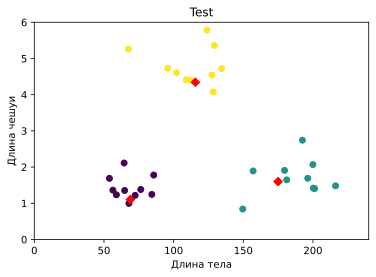

In [17]:
plt.scatter(test['x'], test['y'], c=test_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

plt.xlim(0, 240)
plt.ylim(0, 6)

plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Test')

## AgglomerativeClusternig

Агломеративные алгоритмы - алгоритмы иерархического подхода, основанные на обЪединении мелких кластеров в более крупные.
Вначале каждый объект считается отдельным кластером.

Другие алгоритмы иерархического подхода - `*дивизионные*` - используют обратный порядок, когда сначала вся выборка считается одним кластером, и затем этот кластер делится на более мелкие

In [18]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3)

In [19]:
train_labels = model.fit_predict(train_scaled)
train_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Text(0.5, 1.0, 'Train')

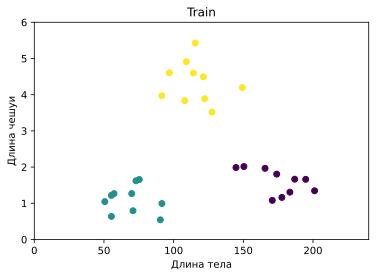

In [20]:
plt.scatter(train['x'], train['y'], c=train_labels)

plt.xlim(0, 240)
plt.ylim(0, 6)

plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Train')

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

In [22]:
knn.fit(train_scaled, train_labels)

KNeighborsClassifier()

In [23]:
test_labels = knn.predict(test_scaled)
test_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Text(0.5, 1.0, 'Test')

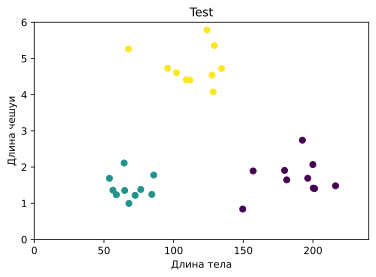

In [24]:
plt.scatter(test['x'], test['y'], c=test_labels)

plt.xlim(0, 240)
plt.ylim(0, 6)

plt.xlabel('Длина тела')
plt.ylabel('Длина чешуи')
plt.title('Test')